#**An Enhanced AI-Based Secure Network Intrusion Detection System**

This proposed system for Network Intrusion Detection system using Artificial Intelligence techniques to predict whether the network is normal or anomalous has various steps:
1. Importing necessary libraries and packages
2. Loading dataset
3. Visualising the dataset
4. Data cleaning
5. Numericalisation
6. Normalization
8. Splitting input and target
9. Feature elimination
10. Split train and test data
10. Classification
11. Evaluation


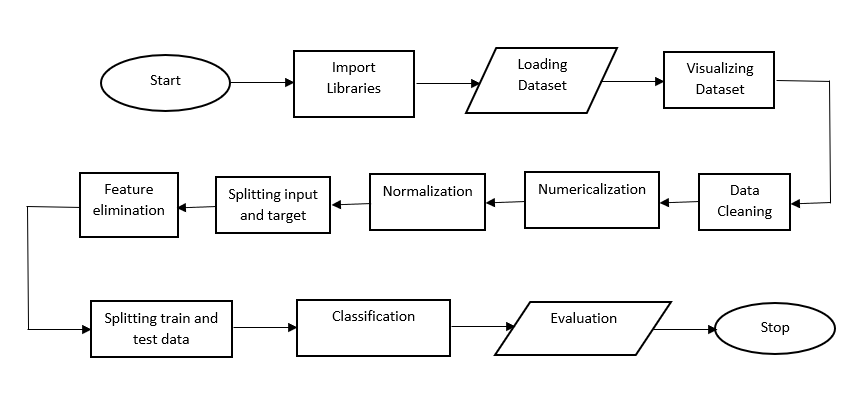

#**Import all the libraries:**


* Pandas: For reading datasets, data cleaning, and analysis. 
* Numpy: For replacing infinite values and predicting results in arrays
* Seaborn: A visualisation library for heatmaps
* Matplotlib: A visualisation library for creating plots and histograms
* sklearn.preprocessing: For scaling and encoding such as MinMaxScaler, LabelEncoder, and OneHotEncoder
* sklearn.model_selection: For splitting datasets into train and test subsets.
* sklearn.feature_selection: Module in the scikit-learn library for feature selection using RFE.
* sklearn.ensemble: For building ensemble models using RandomForest and AdaBoost
* sklearn.svm: For classification using SVC
* sklearn.discriminant_analysis: For linear discriminant analysis
* sklearn.naive_bayes: Classification using a Gaussian Naive Bayes classifier
* sklearn.metrics: For evaluating the performance of models.
* keras.models: To import the Sequential class from the Keras library.
* keras.layers: Module of a neural network model in Keras which has layer type like Dense, LSTM


In [34]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB 
from keras import layers
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, auc

#Dataset Load: 
The dataset for intrusion detection systems is provided by Kaggle (https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection?resource=download), which gathers raw TCP/IP data from the network. Each TCP/IP connection has a total of 41 features, of which 3 are categorical and 38 are numerical. The class features is divided into two groups, each of which is classified as either normal or anomaly. The data.head(10) function will display the first 10 instances of the dataframe.

In [35]:
!gdown https://drive.google.com/uc?id=1-7vh-ohoqQhqCqZWJQhQgIrq30R-tjZF

Downloading...
From: https://drive.google.com/uc?id=1-7vh-ohoqQhqCqZWJQhQgIrq30R-tjZF
To: /content/intrusion.csv
100% 2.88M/2.88M [00:00<00:00, 191MB/s]


In [36]:
#Read the csv file and display the dataframe
data = pd.read_csv('/content/intrusion.csv')
data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


#**Summarize** Dataset:
The data's dimensions for its rows and columns are obtained using the shape attribute.The data.groupby('class').size() method is used to count the number of instances of class.

In [37]:
print("Shape", data.shape) #Dimension of dataset
print("\nDistribution of Label\n", data.groupby('class').size()) # Label Distribution

Shape (25192, 42)

Distribution of Label
 class
anomaly    11743
normal     13449
dtype: int64


#Data Cleaning: 
A few steps in the data cleansing process include:

* Analysing the data and eliminating features with a single unique value.
* Deleting the row with the redundant values.
* Rows containing empty values are removed.
* Infinite values should be changed to NaN values.
* The values of NaN are changed to 0.


In [38]:
# Remove features with only one value
remove = [x for x in data.columns if data[x].nunique() == 1]
data = data.drop(remove, axis=1)
#Removing identical rows
data.drop_duplicates(inplace=True)
# Removes rows with missing values
data.dropna(inplace=True)  
data.replace([np.inf, -np.inf], np.nan) # replace infinite values with NaN
data.fillna(0) # replace NaN values with 0
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


As a result of data cleaning, two features, such as num_outbound_cmds and is_host_login, are removed from the dataframe.

#**Data Visualisation:**

Here, histograms are plotted in a 3X3 grid of subplots for a few selected features such as 'dst_host_srv_diff_host_rate', 'dst_host_same_src_port_rate', 'dst_host_diff_srv_rate', 'dst_host_same_srv_rate', 'dst_host_srv_count', 'protocol_type', 'flag', 'service', 'class'

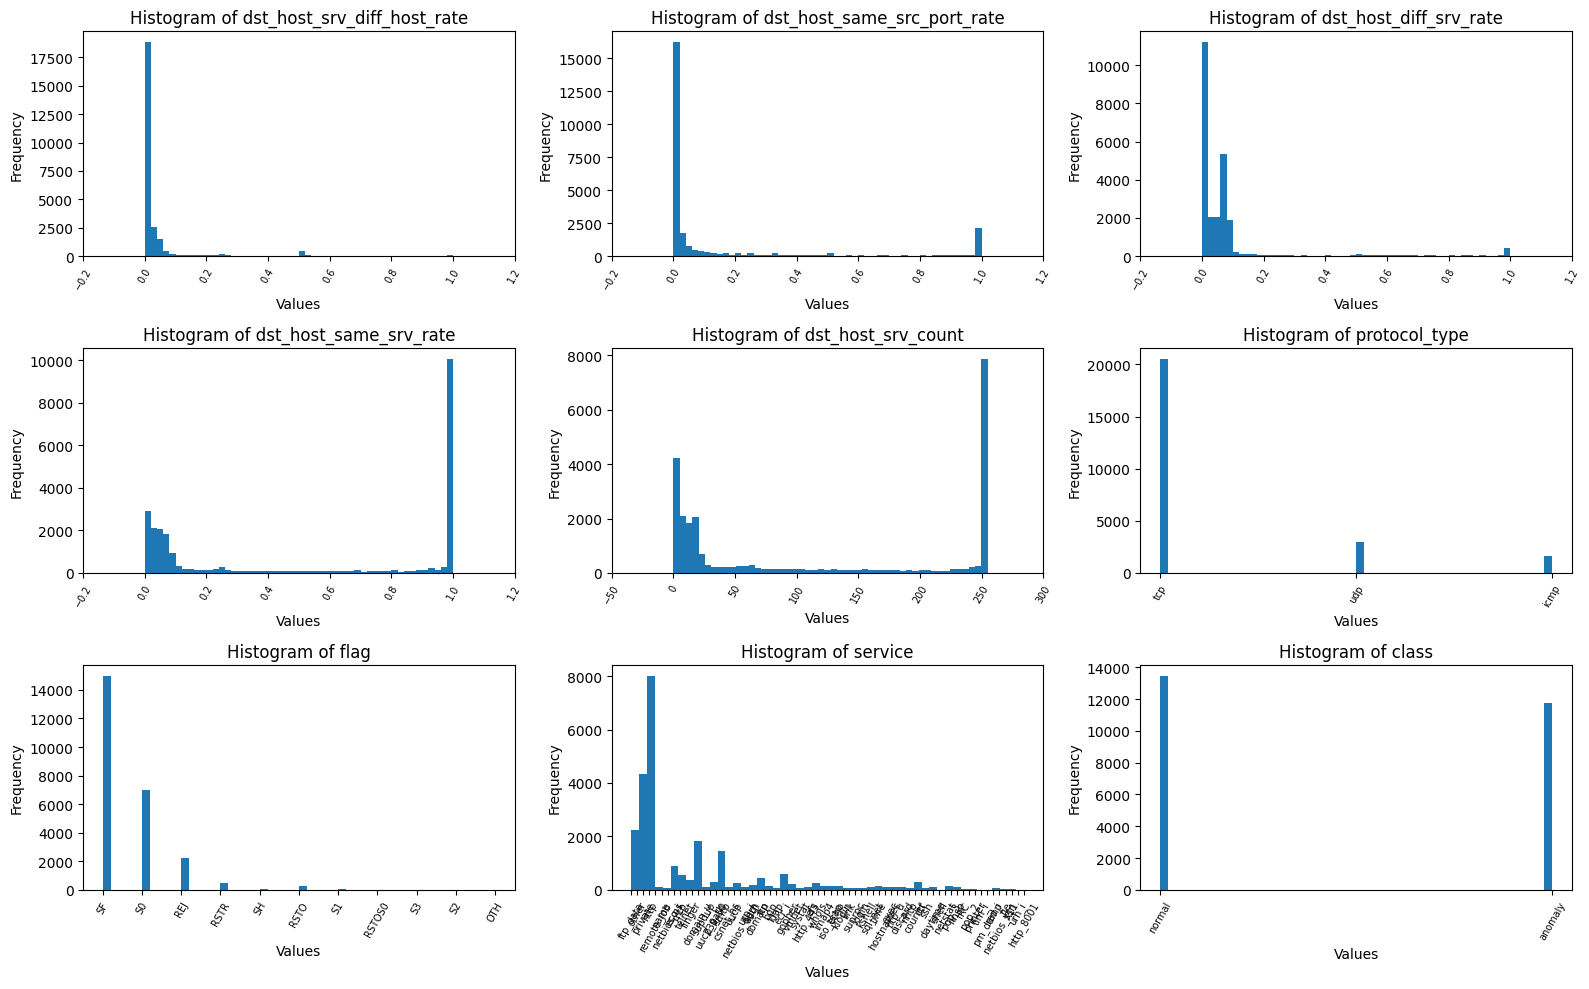

In [39]:
hist= ['dst_host_srv_diff_host_rate','dst_host_same_src_port_rate','dst_host_diff_srv_rate','dst_host_same_srv_rate','dst_host_srv_count','protocol_type', 'flag','service','class']
fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(16, 10))
axs = axs.flatten()
for i, feature in enumerate(hist):
    ax = axs.flatten()[i]
    ax.hist(data[feature], bins=50)
    ax.set_title("Histogram of "+feature)
    ax.set_xlabel("Values")
    ax.set_ylabel("Frequency")
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=60, fontsize=7)
plt.tight_layout()
plt.show()							

Here, using the Seaborn library, a correlation heatmap is drawn to visualise the correlation between each feature in the dataframe.

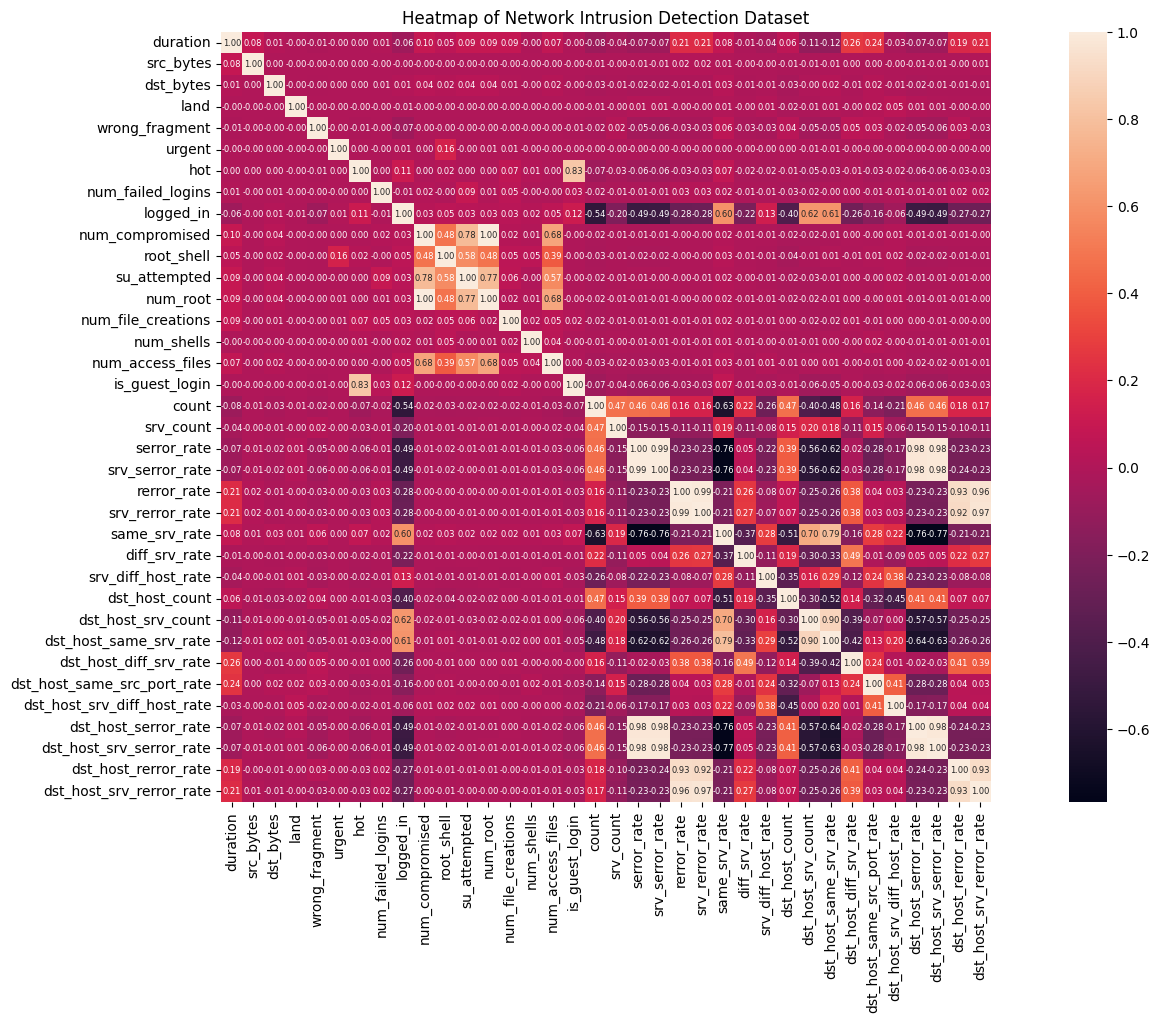

In [40]:
corr = data.corr(numeric_only=True)
plt.figure(figsize=(20,10))
plt.title('Heatmap of Network Intrusion Detection Dataset') 
map=sns.heatmap(corr,square=True, annot=True, fmt='.2f', annot_kws={"fontsize":6})     
plt.show()

#Numericalization: 
This process of converts nonnumerical data into numerical data  The NIDS dataset has 41 features; 2 features were removed in data cleaning, 3 were categorial, and 36 were numerical. The OneHotEncoder technique is applied on protocol_type and flag to convert into numerical features. The OneHotEncoder encodes categorical features into a one-hot numeric array. With this technique, a feature column with binary values is created for each unique category. Thus, all the feature values of protocol_type and flag from the dataset are converted into numerical form. The LabelEncoder is used to convert the label 'normal' and 'anomaly' and service feature values into numeric values. This encoder will encode the category values into numeric values between 0 and n_classes-1.



In [41]:
#Applying OneHotEncoding
categorical = ['protocol_type', 'flag']
encoded = pd.get_dummies(data[categorical], columns=categorical)
data = data.drop(columns=categorical)# Drop the 'protocol_type' and 'flag' columns
data = pd.concat([data, encoded], axis=1)
# Label encoding for converting Label to numerical values
encoder = LabelEncoder()
data['service'] = encoder.fit_transform(data['service'])
data['class'] = encoder.fit_transform(data['class'])
data = pd.DataFrame(data)
print("Features are" , data.columns)

Features are Index(['duration', 'service', 'src_bytes', 'dst_bytes', 'land',
       'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in',
       'num_compromised', 'root_shell', 'su_attempted', 'num_root',
       'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class', 'protocol_type_icmp',
       'protocol_type_tcp', 'protocol_type_udp', 'flag_OTH', 'flag_REJ',
       'flag_RSTO', 'flag_RSTOS0', 'flag_RSTR', 'flag_S0', 'flag_S1',
       'flag_S2', 'flag_S3', 'flag_SF', 'flag_SH'],
      dtype=

#Normalization: 
Normalisation is the process of adjusting the value of every features to lie within the interval [0, 1]. To improve classification performance, this method is carried out. The **MinMaxScalar** transform all the features to a range  [0, 1].

In [42]:
# Apply normalization to scale all values into a range [0,1]
norm = MinMaxScaler()
data[data.columns[:-1]] = norm.fit_transform(data[data.columns[:-1]])
data

,duration,service,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,0.292308,1.286320e-06,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
1,0.0,0.630769,3.824902e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,0.0,0.707692,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,0.0,0.338462,6.077927e-07,0.001583,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,0.0,0.338462,5.213394e-07,0.000082,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0.0,0.246154,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25188,0.0,0.292308,8.750119e-07,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
25189,0.0,0.707692,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25190,0.0,0.584615,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0


#Splitting input and target

In [43]:
X=data.drop('class', axis=1) # select all columns except target variable
y=data['class'] # select only the target variable column

#Feature Elimination:
The dataset contains 41 features, and 12 new features were added as a result of applying OneHot encoding to features like protocol_type and flag. However, some of these features are not needed for finding intrusion, those are eliminated in this method in order to maximise efficiency and decrease computation time. To get the highest level of classification accuracy, 25 features are used. To recursively remove features, scikit-learn's RFE() function is used.

In [44]:
# Recursively eliminating features
selected_features = []
model = RandomForestClassifier(n_estimators=100, random_state=42)
remove = RFE(estimator=model, n_features_to_select=25, step=1)
remove.fit(X, y)
for i in range(len(remove.support_)):
    if remove.support_[i]:
        selected_features.append(X.columns[i])
print(selected_features)

['service', 'src_bytes', 'dst_bytes', 'hot', 'logged_in', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'protocol_type_icmp', 'protocol_type_tcp', 'protocol_type_udp', 'flag_SF']


#Splitting dataset for training and testing

In [45]:
X_train, X_test, y_train, y_test= train_test_split(X[selected_features], y, test_size=0.2)
X_train

,service,src_bytes,dst_bytes,hot,logged_in,count,srv_count,serror_rate,srv_serror_rate,same_srv_rate,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_SF
12252,0.200000,4.715633e-08,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,1.00,...,1.00,1.00,0.00,0.00,0.00,0.00,1.0,0.0,0.0,1.0
10,0.707692,0.000000e+00,0.000000,0.0,0.0,0.400000,0.021569,0.0,0.0,0.06,...,0.00,0.00,0.00,0.00,1.00,1.00,0.0,1.0,0.0,0.0
19436,0.784615,3.866819e-06,0.000064,0.0,1.0,0.000000,0.000000,0.0,0.0,1.00,...,0.01,0.02,0.00,0.01,0.03,0.04,0.0,1.0,0.0,1.0
10464,0.707692,7.335429e-08,0.000000,0.0,0.0,0.029412,0.029412,0.0,0.0,1.00,...,0.18,0.00,0.00,0.00,0.00,0.00,0.0,0.0,1.0,1.0
9967,0.215385,2.703630e-06,0.000000,0.0,0.0,0.358824,0.358824,0.0,0.0,1.00,...,0.07,0.00,0.02,0.00,0.62,0.00,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11661,0.784615,3.557683e-06,0.000064,0.0,1.0,0.000000,0.001961,0.0,0.0,1.00,...,0.02,0.02,0.00,0.00,0.00,0.00,0.0,1.0,0.0,1.0
2788,0.861538,0.000000e+00,0.000000,0.0,0.0,0.586275,0.037255,1.0,1.0,0.07,...,0.00,0.00,1.00,1.00,0.00,0.00,0.0,1.0,0.0,0.0
12482,0.707692,0.000000e+00,0.000000,0.0,0.0,0.266667,0.027451,0.0,0.0,0.11,...,0.00,0.00,0.00,0.00,1.00,1.00,0.0,1.0,0.0,0.0
5106,0.292308,1.679289e-06,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.0,1.00,...,0.61,0.00,0.00,0.01,0.00,0.00,0.0,1.0,0.0,1.0


#**Evaluating Model:**
Evaluation of model is done by finding accuracy, precision, recall, f1 score, confusion matrix, ROC curve.













In [46]:
#Predicting Accuracy, Presion, Recall, F1 Score
def evaluate(y_test, pred):
  accuracy = accuracy_score(y_test, pred)
  precision = precision_score(y_test, pred)
  recall = recall_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  print('Accuracy:', accuracy)
  print('Precision:', precision)
  print('Recall:', recall)
  print('F1 score:', f1)
  cm(y_test, pred)
  roc(y_test, pred)
# Confusion Matrix using Heatmap  
def cm(y_test, pred):
  print("\nConfusion Matrix")
  cm = confusion_matrix(y_test, pred)
  sns.heatmap(cm, annot=True, fmt='g')
  plt.show()
# Plotting ROC curve
def roc(y_test, pred):
  print("\nReceiver Operating Characteristic (ROC) Curve ")
  fpr, tpr, thresholds = roc_curve(y_test, pred)
  roc_auc = auc(fpr, tpr)
  plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend(loc="lower right")
  plt.show()

#**Classification**
The 25 features which are selected after RFE are taken for classification models like Gaussian Naive Bayes, LDA, SVM, Adaboost, RNN and LSTM were used to that features to detected the attacks.

#Gaussian Naive Bayes:
GaussianNB() is a classification algorithm which calculates the mean and variance of each feature for each label and uses this result to estimate the probability of each label given the observed features of a new instance.

Accuracy: 0.9239928557253423
Precision: 0.9300518134715026
Recall: 0.9283339490210565
F1 score: 0.9291920872619708

Confusion Matrix


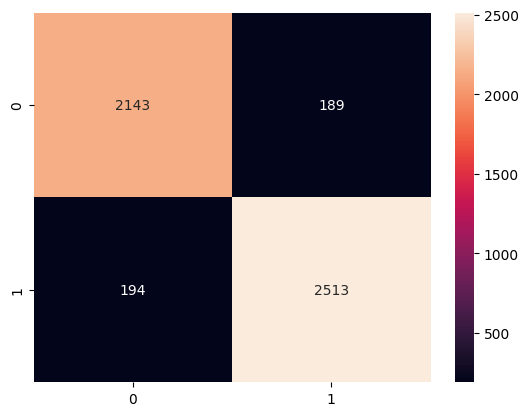


Receiver Operating Characteristic (ROC) Curve 


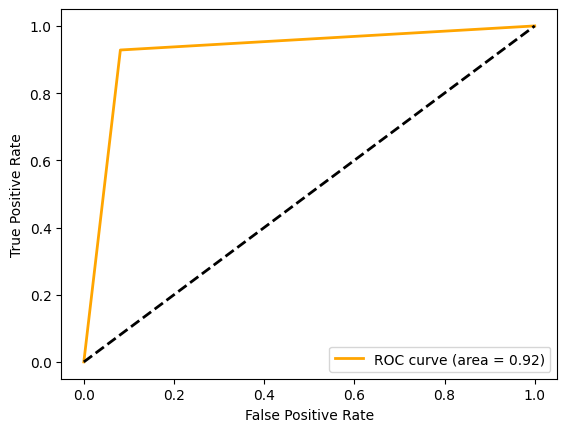

None


In [47]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
pred= gnb.predict(X_test)
print(evaluate(y_test, pred))

#**Linear Discriminant Analysis**:
This algorithm models the distribution of the label in the data and uses this result to make predictions on new data for binary or multi class problems. 

Accuracy: 0.9464179400674737
Precision: 0.9422867513611616
Recall: 0.9589951976357591
F1 score: 0.9505675576711828

Confusion Matrix


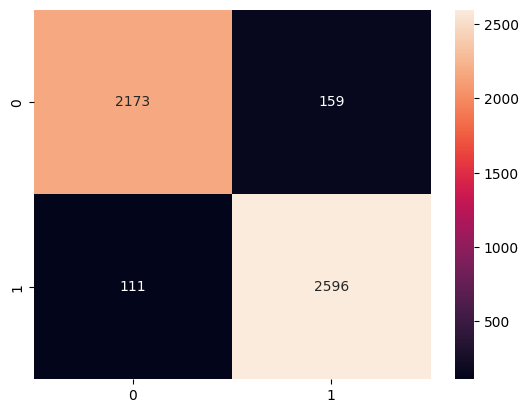


Receiver Operating Characteristic (ROC) Curve 


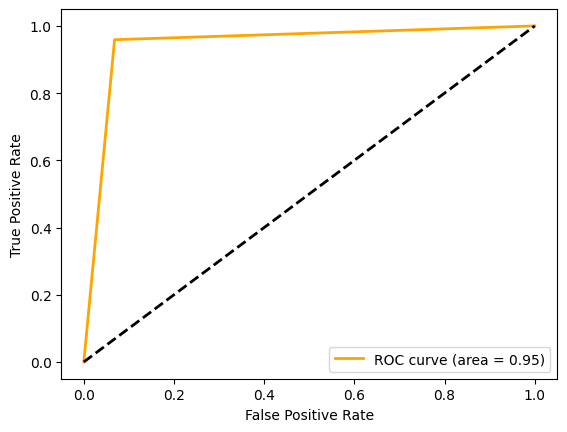

None


In [48]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
pred= lda.predict(X_test)
print(evaluate(y_test, pred))

#**Support Vector Classification:**
SVC is used for solving classification algorithm, it finds the decision boundary or hyperplan that splits the different labels in the feature space. 

Accuracy: 0.9773764635840445
Precision: 0.9754308764209755
Recall: 0.9826376062061323
F1 score: 0.9790209790209791

Confusion Matrix


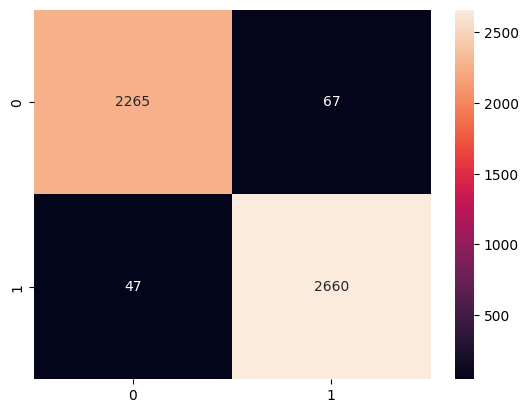


Receiver Operating Characteristic (ROC) Curve 


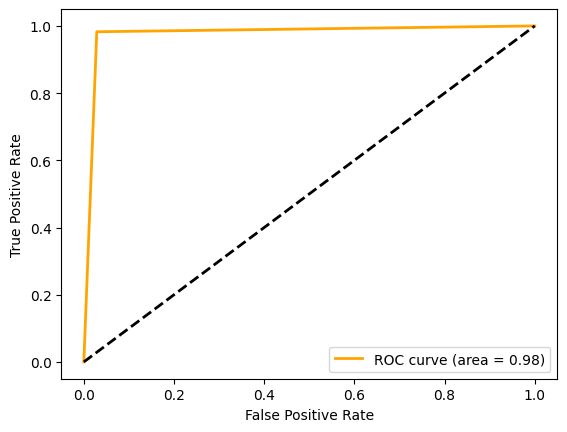

None


In [49]:
svc = SVC()
svc.fit(X_train, y_train)
pred= svc.predict(X_test)
print(evaluate(y_test, pred))

#**AdaBoost:**
AdaBoost or Adaptive Boosting Classifier, is an ML algorithm that combines many weak classifiers to form a strong classifier. It repeatedly train a sequence of weak classifiers on the training data. After each iteration, the algorithm gives more weight to the misclassified instances from the previous iteration and trains a new weak classifier on the updated weighted dataset. Then the final model is a sum of weight of weak classifiers.

Accuracy: 0.9833300257987696
Precision: 0.9844846693756927
Recall: 0.9844846693756927
F1 score: 0.9844846693756927

Confusion Matrix


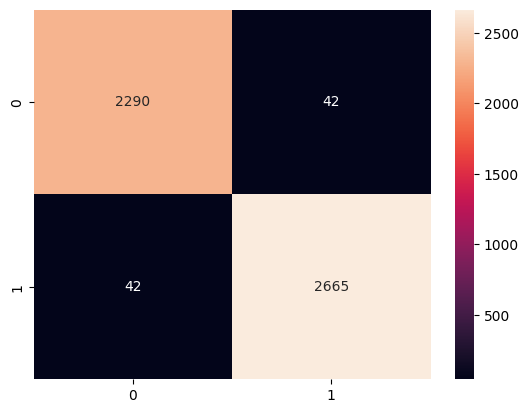


Receiver Operating Characteristic (ROC) Curve 


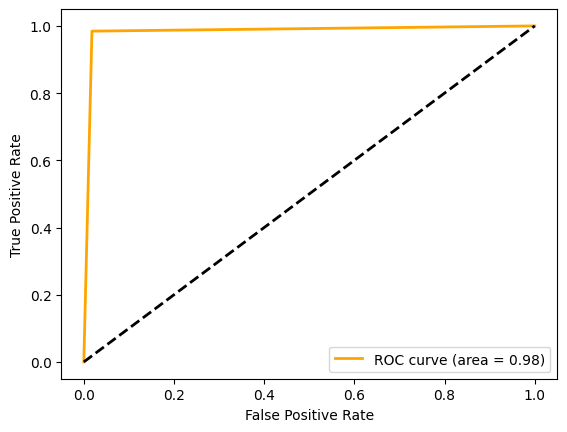

None


In [50]:
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
pred= ada.predict(X_test)
print(evaluate(y_test, pred))

#**Long Short-Term Memory:**
LSTM has memory cell to store information over long time periods. It has the ability to forget or remember information based on the input and the current state of the data.



In [51]:
lstm = Sequential()
lstm.add(LSTM(64, return_sequences=True, input_shape=(None, 1)))
lstm.add(Dense(1, activation='sigmoid'))
lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test), verbose=2)
accuracy = lstm.evaluate(X_test, y_test, verbose=0)
print('The accuracy of LSTM:\n', accuracy)

Epoch 1/20
315/315 - 9s - loss: 0.6416 - accuracy: 0.5853 - val_loss: 0.5890 - val_accuracy: 0.6067 - 9s/epoch - 29ms/step
Epoch 2/20
315/315 - 5s - loss: 0.5405 - accuracy: 0.6701 - val_loss: 0.4812 - val_accuracy: 0.7318 - 5s/epoch - 16ms/step
Epoch 3/20
315/315 - 6s - loss: 0.3985 - accuracy: 0.7888 - val_loss: 0.3558 - val_accuracy: 0.8172 - 6s/epoch - 19ms/step
Epoch 4/20
315/315 - 5s - loss: 0.3413 - accuracy: 0.8168 - val_loss: 0.3421 - val_accuracy: 0.8126 - 5s/epoch - 16ms/step
Epoch 5/20
315/315 - 5s - loss: 0.3207 - accuracy: 0.8308 - val_loss: 0.3061 - val_accuracy: 0.8405 - 5s/epoch - 16ms/step
Epoch 6/20
315/315 - 6s - loss: 0.3039 - accuracy: 0.8421 - val_loss: 0.2977 - val_accuracy: 0.8504 - 6s/epoch - 18ms/step
Epoch 7/20
315/315 - 5s - loss: 0.2928 - accuracy: 0.8490 - val_loss: 0.2849 - val_accuracy: 0.8620 - 5s/epoch - 16ms/step
Epoch 8/20
315/315 - 6s - loss: 0.2841 - accuracy: 0.8593 - val_loss: 0.2774 - val_accuracy: 0.8631 - 6s/epoch - 19ms/step
Epoch 9/20
315/3

#**Recurrent Neural Network:**
RNN is a neural network architecture that can learn to update its hidden state each time by applying a set of learned weights. The updated hidden state is then passed to the next iteration, where it is combined with the input at that timestep to generate a new hidden state, and so on. 

In [52]:
# Define the RNN model
rnn = Sequential([
    layers.SimpleRNN(64, return_sequences=True, input_shape=(None, 1)),
    layers.SimpleRNN(64),
    layers.Dense(1, activation='sigmoid')])
rnn.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
rnn.fit(X_train, y_train, epochs=20,batch_size=64, validation_data=(X_test, y_test)) # Train the model
accuracy = rnn.evaluate(X_test, y_test, verbose=0)
print('The accuracy of RNN:\n', accuracy)

Epoch 1/20
315/315 [==============================] - 7s 16ms/step - loss: 0.1289 - accuracy: 0.9492 - val_loss: 0.0751 - val_accuracy: 0.9718
Epoch 2/20
315/315 [==============================] - 5s 17ms/step - loss: 0.0817 - accuracy: 0.9708 - val_loss: 0.0856 - val_accuracy: 0.9682
Epoch 3/20
315/315 [==============================] - 4s 14ms/step - loss: 0.0675 - accuracy: 0.9759 - val_loss: 0.0691 - val_accuracy: 0.9782
Epoch 4/20
315/315 [==============================] - 6s 18ms/step - loss: 0.0588 - accuracy: 0.9792 - val_loss: 0.0662 - val_accuracy: 0.9796
Epoch 5/20
315/315 [==============================] - 4s 14ms/step - loss: 0.0590 - accuracy: 0.9782 - val_loss: 0.0509 - val_accuracy: 0.9841
Epoch 6/20
315/315 [==============================] - 4s 14ms/step - loss: 0.0549 - accuracy: 0.9809 - val_loss: 0.0595 - val_accuracy: 0.9802
Epoch 7/20
315/315 [==============================] - 6s 18ms/step - loss: 0.0528 - accuracy: 0.9824 - val_loss: 0.0576 - val_accuracy: 0.9792